## Overview
>Predicting a company's bankruptcy can act as an alarm to a company's top management to take action to avoid the company's demise. It can also guide an investor on which companies to avoid investing in and it can advise a job seeker on companies to steer away from.


>In the Data tab you will find 3 files: trainData.csv, testData.csv and sampleSubmission.csv.

## Pakages Installation

In [3]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


## Libraries Installation

In [58]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, ConfusionMatrixDisplay
from mlxtend.evaluate import confusion_matrix
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [5]:
from imblearn.over_sampling import SMOTE

## Import Dataset

In [6]:
dftrain=pd.read_csv("trainData.csv")

## Data Exploration & Cleaning

In [7]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27223 entries, 0 to 27222
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      27223 non-null  int64  
 1   Attr1   27223 non-null  float64
 2   Attr2   27223 non-null  float64
 3   Attr3   27223 non-null  float64
 4   Attr4   27223 non-null  float64
 5   Attr5   27223 non-null  float64
 6   Attr6   27223 non-null  float64
 7   Attr7   27223 non-null  float64
 8   Attr8   27223 non-null  float64
 9   Attr9   27223 non-null  float64
 10  Attr10  27223 non-null  float64
 11  Attr11  27223 non-null  float64
 12  Attr12  27223 non-null  float64
 13  Attr13  27223 non-null  float64
 14  Attr14  27223 non-null  float64
 15  Attr15  27223 non-null  float64
 16  Attr16  27223 non-null  float64
 17  Attr17  27223 non-null  float64
 18  Attr18  27223 non-null  float64
 19  Attr19  27223 non-null  float64
 20  Attr20  27223 non-null  float64
 21  Attr22  27223 non-null  float64
 22

In [8]:
dftrain.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,27223.0,13612.000000,7858.747525,1.000000,6806.500000,13612.000000,20417.50000,2.722300e+04
Attr1,27223.0,0.066933,0.567807,-6.815000,0.004930,0.051329,0.12738,8.745900e+01
Attr2,27223.0,0.499939,2.643989,-430.870000,0.280790,0.476000,0.68303,1.306300e+01
Attr3,27223.0,0.180411,0.378568,-12.135000,0.023201,0.189390,0.38048,9.939600e-01
Attr4,27223.0,2.723166,6.986696,0.003577,1.053500,1.542100,2.63805,5.088600e+02
...,...,...,...,...,...,...,...,...
Attr61,27223.0,12.742509,182.748142,0.000408,4.613200,6.713300,10.30300,2.686200e+04
Attr62,27223.0,483.977080,45098.785365,0.015563,43.931500,72.482000,115.85000,7.276000e+06
Attr63,27223.0,8.335065,142.717897,0.000000,3.150200,5.035700,8.30600,2.345400e+04
Attr64,27223.0,34.913433,1102.370164,-10677.000000,2.197750,4.221800,9.16555,1.581800e+05


In [9]:
dftrain.isnull().sum()

ID        0
Attr1     0
Attr2     0
Attr3     0
Attr4     0
         ..
Attr61    0
Attr62    0
Attr63    0
Attr64    0
Class     0
Length: 64, dtype: int64

In [10]:
dftrain.drop('ID',axis=1,inplace=True)

In [11]:
dftrain.duplicated().sum()

196

## Imbalancing The Data

In [12]:
fraud=dftrain["Class"].value_counts()[0]
normal=dftrain["Class"].value_counts()[1]
records=len(dftrain.index)
print('Normal: {} = {:.3%}'.format(0, fraud/records))
print('Fraud: {} = {:.3%}'.format(1, normal/records))

Normal: 0 = 96.800%
Fraud: 1 = 3.200%


In [13]:
df= dftrain.copy()

In [14]:
x= df.drop('Class', axis = 1)
y= df['Class'].values


In [15]:
X_train, X_test, Y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify = y)

Original dataset shape Counter({0: 21081, 1: 697}) - Total Rows: 21778
Resampled dataset shape Counter({0: 21081, 1: 10540}) - Total Rows: 31621


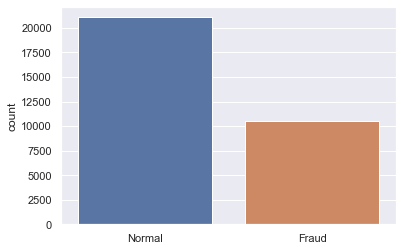

In [16]:
print('Original dataset shape %s' % Counter(Y_train), '- Total Rows:', len(Y_train))

# oversample minority class to contain
# half the amount of samples in the majority class
smote = SMOTE(sampling_strategy = 0.5)

X_smote, y_smote = smote.fit_resample(X_train, Y_train)

print('Resampled dataset shape %s' % Counter(y_smote), '- Total Rows:', len(y_smote))

ax = sns.countplot(x = y_smote, palette='deep');
ax.set_xticks(ticks=[0,1]);
ax.set_xticklabels(labels=['Normal', 'Fraud']);

## Random Forest Model

In [17]:
rf_smote_model = RandomForestClassifier(random_state = 0, n_estimators = 100)
rf_smote_model.fit(X_smote, y_smote)

RandomForestClassifier(random_state=0)

In [18]:
rf_smote_y_pred = rf_smote_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      5271
           1       0.46      0.39      0.42       174

    accuracy                           0.97      5445
   macro avg       0.72      0.69      0.70      5445
weighted avg       0.96      0.97      0.96      5445

Random Forest F1 score: 0.42006269592476486


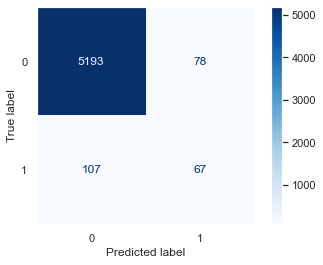

In [19]:
print(classification_report(y_test, rf_smote_y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, rf_smote_y_pred, cmap='Blues')
plt.grid(False)

rf_smote_fscore = f1_score(y_test, rf_smote_y_pred)
print('Random Forest F1 score:', rf_smote_fscore)

## SVM Model

In [20]:
svm_smote_model = make_pipeline(StandardScaler(), LinearSVC(random_state = 0, C = 0.8))
svm_smote_model.fit(X_smote, y_smote)

D:\anaconda\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
D:\anaconda\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=0.8, random_state=0))])

In [21]:
svm_smote_y_pred = svm_smote_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      5271
           1       0.16      0.56      0.25       174

    accuracy                           0.89      5445
   macro avg       0.57      0.73      0.60      5445
weighted avg       0.96      0.89      0.92      5445



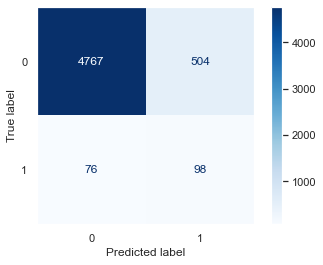

In [22]:
print(classification_report(y_test, svm_smote_y_pred))
svm_smote_fscore = f1_score(y_test, svm_smote_y_pred)

ConfusionMatrixDisplay.from_predictions(y_test, svm_smote_y_pred, cmap='Blues');
plt.grid(False);

## XGB Classifier Model 

In [55]:
xgb_smote_model = XGBClassifier(n_estimators=300, learning_rate=0.3,objective='binary:logistic',  random_state=20)
xgb_smote_model.fit(X_smote, y_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=20, ...)

In [56]:
xgb_smote_y_pred_prob = xgb_smote_model.predict(X_test)
xgb_smote_y_pred = (xgb_smote_y_pred_prob > 0.5).astype(int)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5271
           1       0.84      0.56      0.67       174

    accuracy                           0.98      5445
   macro avg       0.91      0.78      0.83      5445
weighted avg       0.98      0.98      0.98      5445



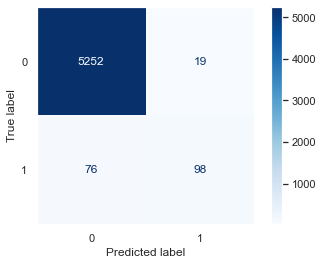

In [57]:
print(classification_report(y_test, xgb_smote_y_pred))
xgb_smote_fscore = f1_score(y_test, xgb_smote_y_pred)

ConfusionMatrixDisplay.from_predictions(y_test, xgb_smote_y_pred, cmap="Blues");
plt.grid(False);

## Prediction

In [47]:
dftest=pd.read_csv("testData.csv")

In [48]:
dftest.drop("ID",axis=1,inplace=True)

In [50]:
pred = xgb_smote_model.predict(dftest)

In [51]:
prediction2 = pd.DataFrame(pred, columns=['Class']).to_csv('prediction2.csv')